In [355]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import os
# Plots
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [356]:
import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./dataset/test.csv
./dataset/train.csv


In [357]:
data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [358]:
print("Number of train samples are",data.shape)
print("Number of test samples are",test_data.shape)

Number of train samples are (75757, 64)
Number of test samples are (9705, 63)


Data Cleaning

In [359]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
miss_count = data.isna().sum()
miss_df = (pd.concat([miss_count.rename('Missing count'),miss_count.div(len(data)).rename('Missing value')],axis = 1).loc[miss_count.ne(0)])
miss_df

,Missing count,Missing value
year_built,1837,0.024249
energy_star_rating,26709,0.352561
direction_max_wind_speed,41082,0.542287
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
days_with_fog,45796,0.604512


In [360]:
data.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [361]:
data.set_index('id', inplace=True)

In [362]:
data

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,0,6,0,0,0,NaN,NaN,NaN,NaN,48.404398


In [363]:
data.drop_duplicates(inplace=True)

In [364]:
data

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,0,6,0,0,0,NaN,NaN,NaN,NaN,48.404398


In [365]:
col_list = data.columns
for col in col_list:
    print(col + " : ", end="")
    print(data[col].dtype)

Year_Factor : int64
State_Factor : object
building_class : object
facility_type : object
floor_area : float64
year_built : float64
energy_star_rating : float64
ELEVATION : float64
january_min_temp : int64
january_avg_temp : float64
january_max_temp : int64
february_min_temp : int64
february_avg_temp : float64
february_max_temp : int64
march_min_temp : int64
march_avg_temp : float64
march_max_temp : int64
april_min_temp : int64
april_avg_temp : float64
april_max_temp : int64
may_min_temp : int64
may_avg_temp : float64
may_max_temp : int64
june_min_temp : int64
june_avg_temp : float64
june_max_temp : int64
july_min_temp : int64
july_avg_temp : float64
july_max_temp : int64
august_min_temp : int64
august_avg_temp : float64
august_max_temp : int64
september_min_temp : int64
september_avg_temp : float64
september_max_temp : int64
october_min_temp : int64
october_avg_temp : float64
october_max_temp : int64
november_min_temp : int64
november_avg_temp : float64
november_max_temp : int64
decemb

In [366]:
sorted_facilities = sorted(data["facility_type"].unique().tolist())

In [367]:
def generate_correlation(data, field, method):
    sorted_catagories = sorted(data[field].unique().tolist())
    for catagory in sorted_catagories:
        filtered_data = data[data[field] == catagory]
        corrMatrix = filtered_data.corr(method=method)
        corrMatrixResults = corrMatrix['site_eui']
        MagnitudeCorrMatricResult = np.absolute(corrMatrixResults)
        MagnitudeCorrMatricResult = pd.DataFrame(MagnitudeCorrMatricResult)
        MagnitudeCorrMatricResult = MagnitudeCorrMatricResult.sort_values("site_eui", ascending=False)
        top_factors = MagnitudeCorrMatricResult[:6].index
        top_data = data[top_factors]
        TopCorrMatrix = top_data.corr(method=method)
        ax = plt.axes()
        sn.heatmap(TopCorrMatrix, annot=True, ax = ax)
        ax.set_title(catagory)
        plt.show()
        
        

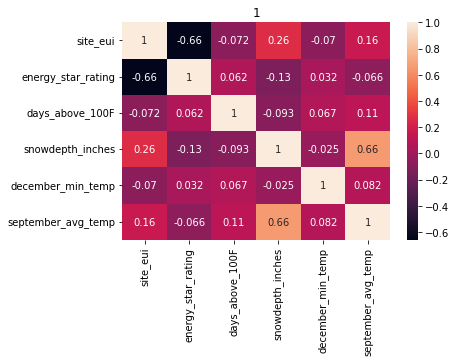

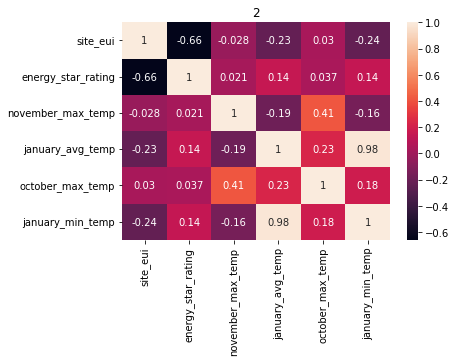

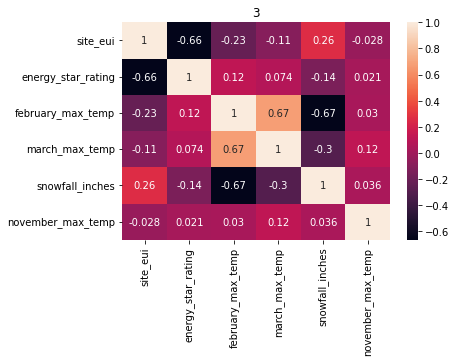

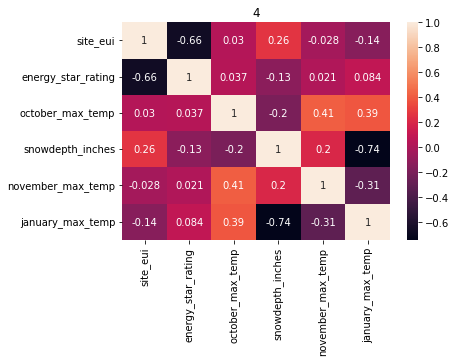

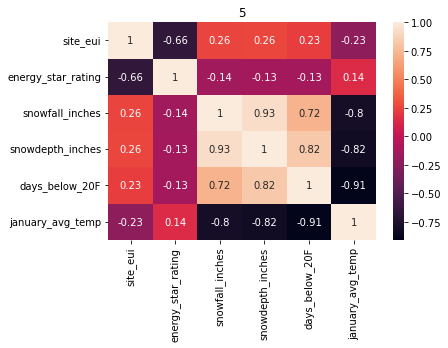

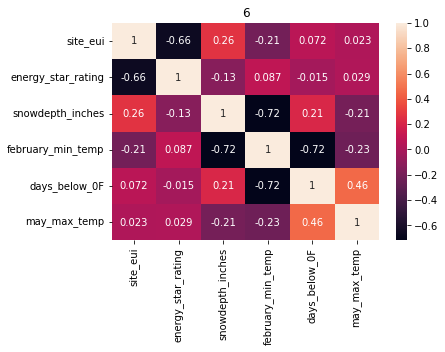

In [372]:
generate_correlation(data, 'Year_Factor', 'spearman')
    
    